In [3]:
import pickle
from extract_consecutive_screenshots import get_pickle_name, load_objects, load_snapshot_data
from visualization import get_connection, get_gta_image_jpg_dir
from os import path
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
import numpy as np

In [4]:
def display_snapshots(car, indices=100):
    if type(indices) is int:
        snapshots_range = (0, indices)
    for snapshot in car['snapshots'][indices[0]:indices[1]]:
        # print(snapshot)
        plt.figure(figsize=(18,18))
        img_path = path.join(get_gta_image_jpg_dir(), 'info-' + snapshot['image'] + '-0.jpg')
        print(img_path)
        img = Image.open(img_path)
        size = img.size
        bbox = np.array(snapshot['bbox'])
        print(size)
        bbox[:, 0] *= size[0]
        bbox[:, 1] *= size[1]
        print(bbox)
        width, height = bbox[0, :] - bbox[1, :]
        rect = patches.Rectangle(bbox[1, :], width, height, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        plt.gca().add_patch(rect)
        
        plt.imshow(img)
        plt.show()

In [5]:
conn = get_connection()
run_id = 8
cars = load_objects(run_id)
len(cars)

7463

In [14]:
car = list(cars.values())[300]
len(car['snapshots'])

338

In [15]:
for car in list(cars.values())[500:320]:
    display_snapshots(car, (0, 5))

In [21]:
snapshot = car['snapshots'][0]
# print(snapshot)
bbox = snapshot['bbox']
# print(bbox)
pos1 = np.array(car['snapshots'][0]['position'])
pos2 = np.array(car['snapshots'][1]['position'])
print(pos1, pos2)
pos2 - pos1
snapshot1 = load_snapshot_data(car['snapshots'][0]['snapshot_id'])
snapshot2 = load_snapshot_data(car['snapshots'][1]['snapshot_id'])
# print(snapshot1, snapshot2)
pos1_homo = np.append(pos1, 1)
print(pos1_homo)
print(snapshot1['view_matrix'])
viewed = np.matmul(pos1_homo, snapshot1['view_matrix'])
projected = np.matmul(viewed, snapshot1['proj_matrix'])
print('viewed', viewed)
print('projected', projected)
print(viewed / viewed[3])
print(projected / projected[3])
print(bbox)

[ -419.0697937  -1231.21643066    20.32040787] [ -419.06958008 -1232.51843262    20.32984161]
[ -4.19069794e+02  -1.23121643e+03   2.03204079e+01   1.00000000e+00]
[[  9.99388993e-01   4.70759463e-04   3.49496901e-02   3.99342749e+02]
 [ -3.47511545e-02   1.20650090e-01   9.92086709e-01   1.14696317e+02]
 [ -3.74964904e-03  -9.92695034e-01   1.20592721e-01  -1.37053604e+03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
viewed [ -3.76103741e+02  -1.68915623e+02  -1.23366932e+03  -3.36417325e+05]
projected [ -4.38098539e+02  -3.62240715e+02   3.36417317e+05  -8.32716920e+01]
[  1.11796781e-03   5.02101437e-04   3.66708023e-03   1.00000000e+00]
[  5.26107407e+00   4.35010634e+00  -4.03999617e+03   1.00000000e+00]
[[ 0.42717671  0.49993107]
 [ 0.41660926  0.48347858]]


### Testing whether matpltolib displaying works:

In [15]:
import matplotlib
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
'DISPLAY' in os.environ

False

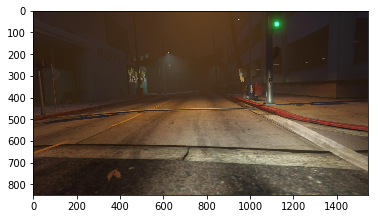

In [3]:
img_path = '/datagrid/personal/racinmat/GTA-jpg/info-2017-11-25--01-59-56--393-0.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.show()

In [16]:
exitval = os.system('python -c "import matplotlib.pyplot as plt; plt.figure()"')
exitval

0

In [6]:
arr = [1, 2, 3, 4, 5]
arr[4:5]

[5]

In [22]:
test = [0, 5]
type(test) in (list, tuple)

True